# Overview: Housing Prices EDA
**Author:** Adila Rahma Widja (22/492834/PA/21146)  
**NIM Type:** Even  
**Class:** Deep Learning Class 2025  
**Assignment:** Mid-term Project  

---

- This notebook serves as the **Exploratory Data Analysis (EDA)** part of my mid-term project.  
- The goal is to explore and understand the [*Housing Prices Dataset* from Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) (for students with even NIM).  
- The analysis will include data inspection, cleaning, encoding categorical variables, and visualization of patterns/correlations, which later can support the deep learning model implementation.

# Importing 

In this section, I import the main Python libraries needed for the EDA:

- **pandas** → data manipulation and analysis  
- **matplotlib.pyplot** → data visualization  
- **seaborn** → advanced visualizations and heatmaps  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Inspecting Dataset
Here, I load the dataset (`Housing.csv`) and quickly inspect its dimensions, null values, and data types.

In [2]:
df = pd.read_csv('Housing.csv')
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
print(df.shape)

(545, 13)


In [4]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# Data Cleaning

## Boolean Columns
Some columns in the dataset such as `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, and `prefarea` are originally in **yes/no** string format.  

To make the dataset more consistent for numerical analysis and later modeling,  
I convert these columns into **boolean type** (`True` for *yes*, `False` for *no*).

In [6]:
# yes-no columns to boolean
cols_to_bool = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in cols_to_bool:
    df[col] = df[col].map({"yes": True, "no": False})

In [7]:
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,True,False,True,False,False,2,False,unfurnished
541,1767150,2400,3,1,1,False,False,False,False,False,0,False,semi-furnished
542,1750000,3620,2,1,1,True,False,False,False,False,0,False,unfurnished
543,1750000,2910,3,1,1,False,False,False,False,False,0,False,furnished


## Furnishing Status Encoding

In [8]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

The column `furnishingstatus` contains **three categories**:  
- `unfurnished`  
- `semi-furnished`  
- `furnished`  

Since machine learning models require numerical input, I encode these categories into integers:  
- **0 → unfurnished**  
- **1 → semi-furnished**  
- **2 → furnished**  

This process ensures that the variable can be used directly in correlation analysis and modeling.

In [9]:
# replace furnishing status to numerical encoding
## 0 = unfurnished; 1 = semi-furnished; 2 = furnished 
df['furnishingstatus'] = df['furnishingstatus'].map({"unfurnished": 0, "semi-furnished": 1, "furnished": 2})

Lastly, I displayed the whole data frame and printed the data types of each column to ensure everything is either numerical or boolean.

In [10]:
display(df)
print(df.dtypes)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,2
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,2
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,1
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,2
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,True,False,True,False,False,2,False,0
541,1767150,2400,3,1,1,False,False,False,False,False,0,False,1
542,1750000,3620,2,1,1,True,False,False,False,False,0,False,0
543,1750000,2910,3,1,1,False,False,False,False,False,0,False,2


price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad             bool
guestroom            bool
basement             bool
hotwaterheating      bool
airconditioning      bool
parking             int64
prefarea             bool
furnishingstatus    int64
dtype: object


# Price Distribution

Before moving to correlations, it is important to check the **distribution of house prices**.  

The histogram below shows how frequently each price range appears in the dataset.

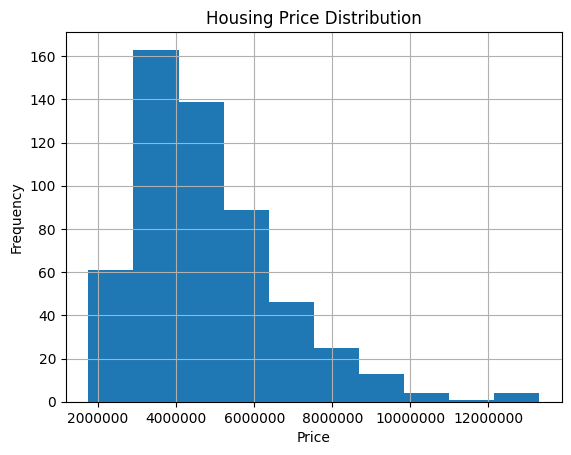

In [11]:
# price distribution with histogram
plt.figure()
df["price"].hist()
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Housing Price Distribution")
plt.ticklabel_format(style="plain", axis="x")
plt.show()

We can see that the price range is **right skewed or positively skewed** by how majority of prices clusters in the low ranges (left) while houses on the higher end of price range (right) are relatively few, making them outliers.

This will be crucial for the modeling part. For now, this is a valuable insight.

# Correlation Analysis

To better understand the relationship among variables in the dataset, I compute the **correlation matrix** and visualize it using a heatmap.  

Correlation analysis is useful to identify potential linear associations between features and the target variable (`price`), as well as among the features themselves.  

Features with higher absolute correlation values (close to **+1** or **-1**) are likely to have stronger predictive power, while those with near-zero correlation contribute less in explaining the variation of house prices. Positive correlations indicate that the feature increases together with price, while negative correlations suggest the opposite trend.

In [12]:
corr = df.corr()
display(corr)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


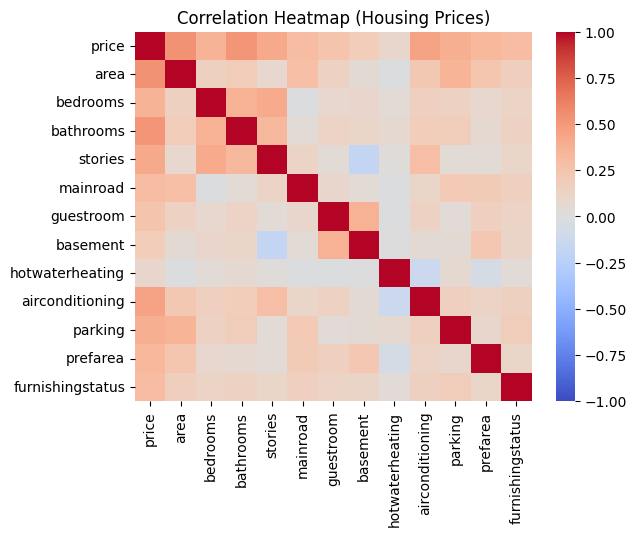

In [13]:
plt.figure
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Housing Prices)")
plt.show()